<!-- ========================= -->
<!-- TÍTULO PRINCIPAL CENTRADO -->
<!-- ========================= -->

<h1 style="text-align: center; color: darkblue;">EDA and Baseline Modeling</h1>

### 📑 <font color='blue'> Table of Contents </font>
1. [Introduction](#introduction)
2. [Setup](#setup)
3. [EDA](#EDA)
4. [Preprocessing](#preprocessing)
5. [Baseline Model](#baseline)
6. [Annex](#annex) <br>
    A. [Class Imbalance](#imbalance)

## <a id="introduction" style="color: darkred; text-decoration: none;">Introduction</a>

This notebook is designed as a quick-start template for an AI project. Its main goals are:  

**1. Exploratory Data Analysis (EDA):**  
   - Understand the dataset  
   - Identify patterns, missing values, and basic statistics.

**2. Data Preprocessing:**  
   - Handle missing values and categorical variables  
   - Normalize or scale features if necessary  


**3. Baseline Modeling:**  
   - Build a simple baseline model for quick prototyping  
   - Evaluate basic performance metrics to set a reference  

This notebook is intended for fast iteration and provides a starting point for more advanced modeling and experimentation. It emphasizes clarity, reproducibility, and rapid prototyping.


## <a id="setup" style="color: darkred; text-decoration: none;">Setup</a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


## <a id="eda" style="color: darkred; text-decoration: none;">EDA</a>

In [8]:
# Load data
df = pd.read_csv('../data/raw.csv',encoding='utf-8')
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [9]:
# shape
df.shape

(569, 33)

-> 569 rows and 33 columns.

In [10]:
# Quick overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
# let's see if there are missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are no missing values in this dataset, so we won't have to worry about dealing with them. However, if there were any, we have different options to handle them:

- Delete the rows with those values (e.g., df.dropna(axis=0))

- Delete the columns with those values (e.g., df.dropna(axis=1))

- Replace the missing values, for example with the mean (df.fillna(df.mean())) or using some estimator.

### Class imbalance

In [12]:
# Count the quantity of 'M' (malignant)
count_malignant = df[df['diagnosis'] == 'M'].shape[0]

# Count the quantity of 'B' (benign)
count_benign = df[df['diagnosis'] == 'B'].shape[0]

print("Quantity of 'M' (malignant):", count_malignant)
print("Quantity of 'B' (benign):", count_benign)

count_malignant/count_benign

Quantity of 'M' (malignant): 212
Quantity of 'B' (benign): 357


0.5938375350140056

The imbalance is moderate (≈60/40), not extreme (like 95/5).

Why we won’t handle imbalance aggressively here

- Models trained on this data can still learn patterns from both classes without strong rebalancing.

- Since our evaluation will focus on recall and F1-score, we’ll already catch whether the model is biased toward the majority class.


Why we mention it anyway

- In real-world medical datasets, imbalance is often much worse (e.g., <10% malignant). In those cases, extra techniques are necessary:

    - Class weights

    - Oversampling / undersampling

    - Advanced synthetic data (e.g., SMOTE)

For this project, the main goal is learning and demonstrating a clean folder structure for ML projects. If we added balancing pipelines now, it would add complexity without adding much learning value, since this dataset is not severely imbalanced.

**Conclusion**

For this project, we’ll acknowledge the imbalance but not act on it.


## <a id="preprocessing" style="color: darkred; text-decoration: none;">Preprocessing</a>

### <font color='darkorange'> Data Preparation Workflow </font>

**1. Pre-split preprocessing:** handle missing values, encode categorical features.  
**2. Train/Validation split**: separate data into training and validation sets.  
**3. Post-split preprocessing:** standardize features using training set statistics.  
**4. Create TensorFlow datasets:** prepare `tf.data.Dataset` objects for efficient training.


<img src="images/preprocessing_workflow.png"/>



### Helper Functions

In [13]:
def preprocess_data(df):
    """
    Preprocess the input DataFrame.

    Steps:
    1. Drop the 'Unnamed: 32' column if it exists.
    2. Drop rows with missing values.
    3. Encode the 'diagnosis' column: 'M' -> 1, 'B' -> 0.
    4. Separate features and labels.

    Args:
        df (pd.DataFrame): Raw input DataFrame.

    Returns:
        features (pd.DataFrame): Feature columns.
        labels (pd.Series): Encoded labels.
    """
    df = df.copy()
    if 'Unnamed: 32' in df.columns:
        df = df.drop(columns=['Unnamed: 32'])
    df = df.dropna()
    
    encoder = {'M': 1, 'B': 0}
    labels = df['diagnosis'].map(encoder)

    features = df.drop(columns=['id', 'diagnosis'])
    return features, labels


def split_data(features, labels, val_size=0.2):
    """
    Split features and labels into training and validation sets.

    Args:
        features (pd.DataFrame): Feature columns.
        labels (pd.Series): Target labels.
        val_size (float): Fraction of data to use for validation.

    Returns:
        X_train, X_val, y_train, y_val
    """
    X_train, X_val, y_train, y_val = train_test_split(
        features, labels,
        test_size=val_size,
        stratify=labels,
        random_state=42
    )
    return X_train, X_val, y_train, y_val


def standardize(X_train, X_val):
    """
    Standardize features using the training set statistics.

    Args:
        X_train (pd.DataFrame): Training features.
        X_val (pd.DataFrame): Validation features.

    Returns:
        X_train_scaled, X_val_scaled (pd.DataFrame): Standardized features.
    """
    scaler = StandardScaler()
    
    # Fit scaler on training set only to avoid data leakage
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train), # fit and transform
        columns=X_train.columns,
        index=X_train.index
    )

    # Apply the same scaler to validation set
    X_val_scaled = pd.DataFrame(
        scaler.transform(X_val), # only transform
        columns=X_val.columns,
        index=X_val.index
    )

    return X_train_scaled, X_val_scaled


def tf_dataset(X, y, batch_size=32, shuffle=True):
    """
    Convert features and labels to a TensorFlow Dataset.

    Args:
        X (pd.DataFrame): Features.
        y (pd.Series): Labels.
        batch_size (int): Batch size for the dataset.
        shuffle (bool): Whether to shuffle the dataset.

    Returns:
        tf.data.Dataset: Batched dataset ready for training.
    """
    ds = tf.data.Dataset.from_tensor_slices(
        (X.values.astype('float32'), y.values.astype('int32'))
    )
    if shuffle:
        ds = ds.shuffle(buffer_size=len(X))
    return ds.batch(batch_size)


### Workflow

In [14]:
features, labels = preprocess_data(df)

X_train, X_val, y_train, y_val = split_data(features, labels)

X_train, X_val = standardize(X_train, X_val)

train_ds = tf_dataset(X_train, y_train, shuffle=True)

val_ds = tf_dataset(X_val, y_val, shuffle=False)

2025-09-03 18:41:22.127001: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
for x,y in train_ds.take(1):
    print(x.shape, y.shape)

(32, 30) (32,)


2025-09-03 18:41:37.226612: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## <a id="baseline" style="color: darkred; text-decoration: none;">Baseline Model</a>

### Helper Functions

In [ ]:
# Plot function
def plot_history(history):
    metrics = ['accuracy', 'precision', 'recall']
    
    plt.figure(figsize=(12, 8))
    
    # Loss
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('Accuracy')
    plt.legend()
    
    # Precision
    plt.subplot(2, 2, 3)
    plt.plot(history.history['precision'], label='train')
    plt.plot(history.history['val_precision'], label='val')
    plt.title('Precision')
    plt.legend()
    
    # Recall
    plt.subplot(2, 2, 4)
    plt.plot(history.history['recall'], label='train')
    plt.plot(history.history['val_recall'], label='val')
    plt.title('Recall')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

### Model

In [17]:
input_dim = X_train.shape[1]

In [18]:
# simple baseline model
def build_compile_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ],name='baseline')
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    
    return model


In [19]:
model = build_compile_model(input_dim)

In [20]:
model.summary()

Model: "baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Evaluate on test set
loss, acc, prec, rec = model.evaluate(X_val, y_val, verbose=0)
print(f"Test Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3824 - loss: 0.7501 - precision: 0.3769 - recall: 1.0000 - val_accuracy: 0.3947 - val_loss: 0.6963 - val_precision: 0.3784 - val_recall: 1.0000
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4505 - loss: 0.6241 - precision: 0.4043 - recall: 0.9941 - val_accuracy: 0.5000 - val_loss: 0.5963 - val_precision: 0.4242 - val_recall: 1.0000
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6022 - loss: 0.5464 - precision: 0.4842 - recall: 0.9941 - val_accuracy: 0.7018 - val_loss: 0.5286 - val_precision: 0.5541 - val_recall: 0.9762
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7736 - loss: 0.4880 - precision: 0.6245 - recall: 0.9882 - val_accuracy: 0.8070 - val_loss: 0.4745 - val_precision: 0.6613 - val_recall: 0.9762
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8703 - loss: 0.4374 - precision: 0.7489 - recall: 0.9824 - val_accuracy: 0.8860 - val_loss: 0.4225 - va

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

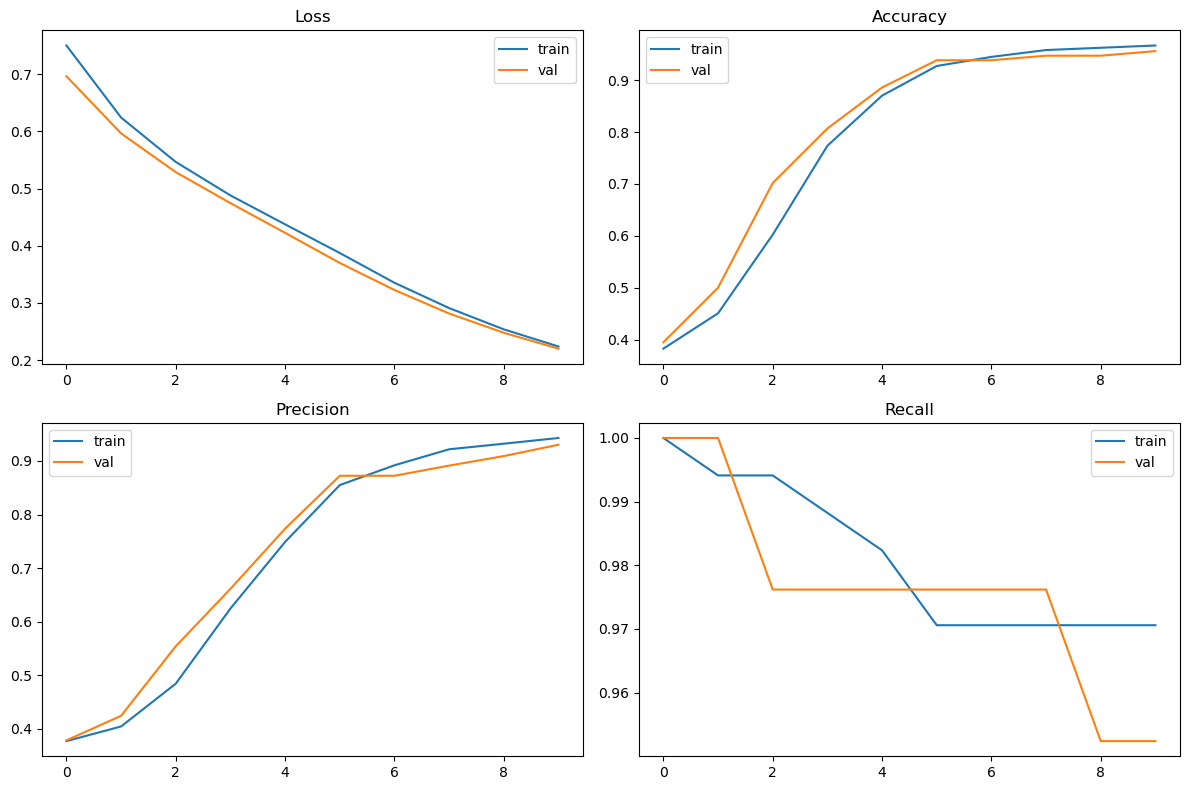

In [28]:
# Plot
plot_history(history)


We can see that we achieve very good results even with a simple model and a few epochs. It's probable that we don't even need a neural network, and simpler models could yield great results. However, this is for a learning project whose goal is to create an end-to-end solution. Therefore, the specific model doesn't really matter. The point of this section is to prove that we can solve the problem efficiently and get an idea of what can work.

## <a id="annex" style="color: darkred; text-decoration: none;">Annex</a>

### <a id="imbalance" style="color: darkorange; text-decoration: none;">A. Class Imbalance</a>

In this project, we have:

- Malignant (M): 212 samples

- Benign (B): 357 samples

That gives a total of 569 samples.

👉 The class distribution is:

- Malignant: 
212
/
569
≈
37
%
212/569≈37%

- Benign: 
357
/
569
≈
63
%
357/569≈63%

So the dataset is imbalanced, but not extremely so. It’s roughly a 60/40 split, which is common in medical datasets where one condition (benign) is more frequent.

**Why it matters**

A naïve model could lean toward predicting "benign" more often and still get good accuracy, but it would miss malignant cases, which are critical in diagnosis.

This imbalance affects recall for the minority class (malignant) the most, since false negatives there are the biggest risk.


Let’s simulate the “always predict benign” case with this dataset:

- Total samples = 569

- Benign = 357

- Malignant = 212

If a classifier always predicts "B" (benign):

- True Negatives (TN) = 357 (all benign correctly predicted)

- False Negatives (FN) = 212 (all malignant misclassified as benign)

- True Positives (TP) = 0

- False Positives (FP) = 0

Now, compute the metrics:

- Accuracy = (TP + TN) / Total = (0 + 357) / 569 ≈ 62.7%

- Precision (malignant as positive class) = TP / (TP + FP) = 0 / 0 → undefined (set to 0)

- Recall (sensitivity for malignant) = TP / (TP + FN) = 0 / (0 + 212) = 0%

- F1-score (malignant) = 0

👉 This shows the problem:

Accuracy looks decent (63%) but the model is useless for detecting malignant cases (the important class in practice).

This is exactly why, with imbalance, we should look at recall, precision, F1, ROC-AUC, PR-AUC, instead of just accuracy.


**Practical notes**

This imbalance is moderate. We don’t necessarily need strong balancing techniques like heavy oversampling, but we should:

- Track metrics beyond accuracy (precision, recall, F1, ROC-AUC, PR-AUC).

- Consider class weighting in your model.

- If needed, try resampling techniques (SMOTE, undersampling, or balanced mini-batches).